In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats as stats

In [2]:
df = pd.read_csv('dataset_mood_smartphone.csv')

# 1 EXPLORATORY DATA ANALYSIS
TASK 1A: Exploratory Data Analysis 

Total records: 376912
Distinct attributes: 19
Unique users: 27
Number of days recorded: 113

Descriptive statistics by attribute:
               Attribute    count        mean         std        min  \
0               activity  22965.0    0.115958    0.186946      0.000   
1         appCat.builtin  91288.0   18.538262  415.989243 -82798.871   
2   appCat.communication  74276.0   43.343792  128.912750      0.006   
3   appCat.entertainment  27125.0   37.576480  262.960476     -0.011   
4         appCat.finance    939.0   21.755251   39.218361      0.131   
5            appCat.game    813.0  128.391615  327.145246      1.003   
6          appCat.office   5642.0   22.578892  449.601382      0.003   
7           appCat.other   7650.0   25.810839  112.781355      0.014   
8          appCat.social  19145.0   72.401906  261.551846      0.094   
9          appCat.travel   2846.0   45.730850  246.109307      0.080   
10        appCat.unknown    939.0   45.553006  119.400405      0.111   
11    

/var/folders/f2/gq8xgm9x491cqwtct_tgpy0h0000gn/T/ipykernel_98055/1991186339.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(frequency_by_variable.index, rotation=45, ha='right')


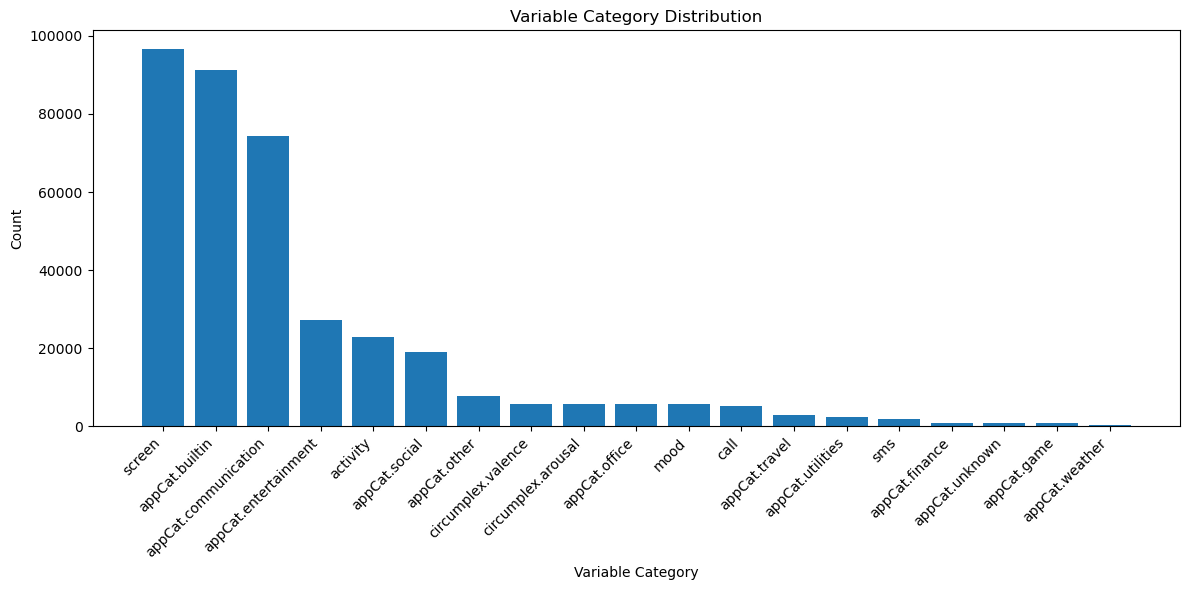

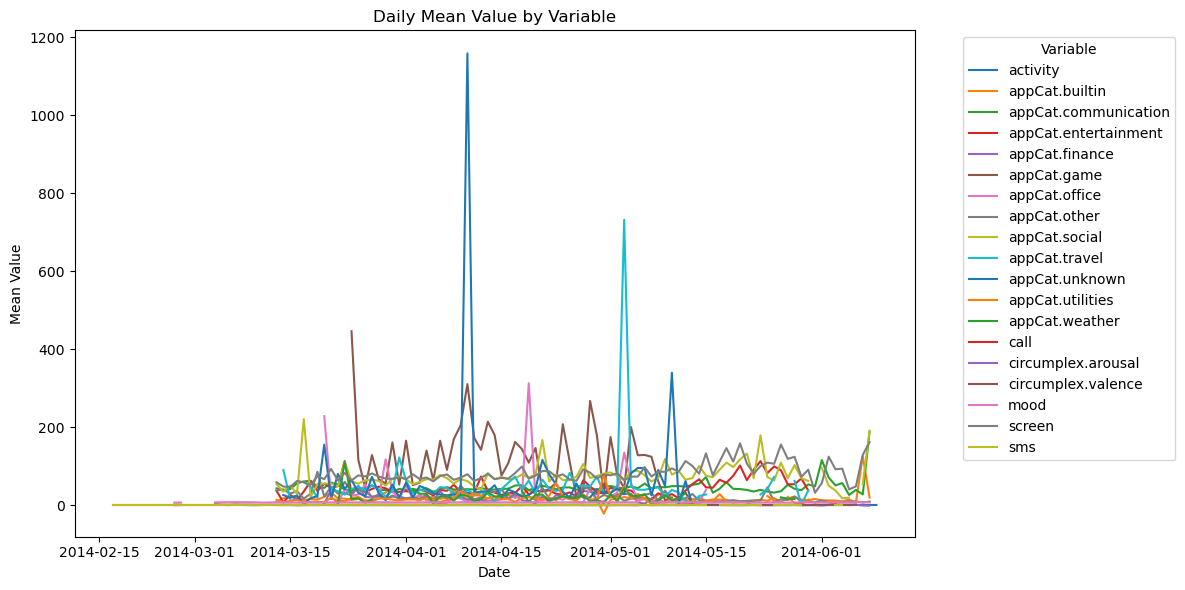

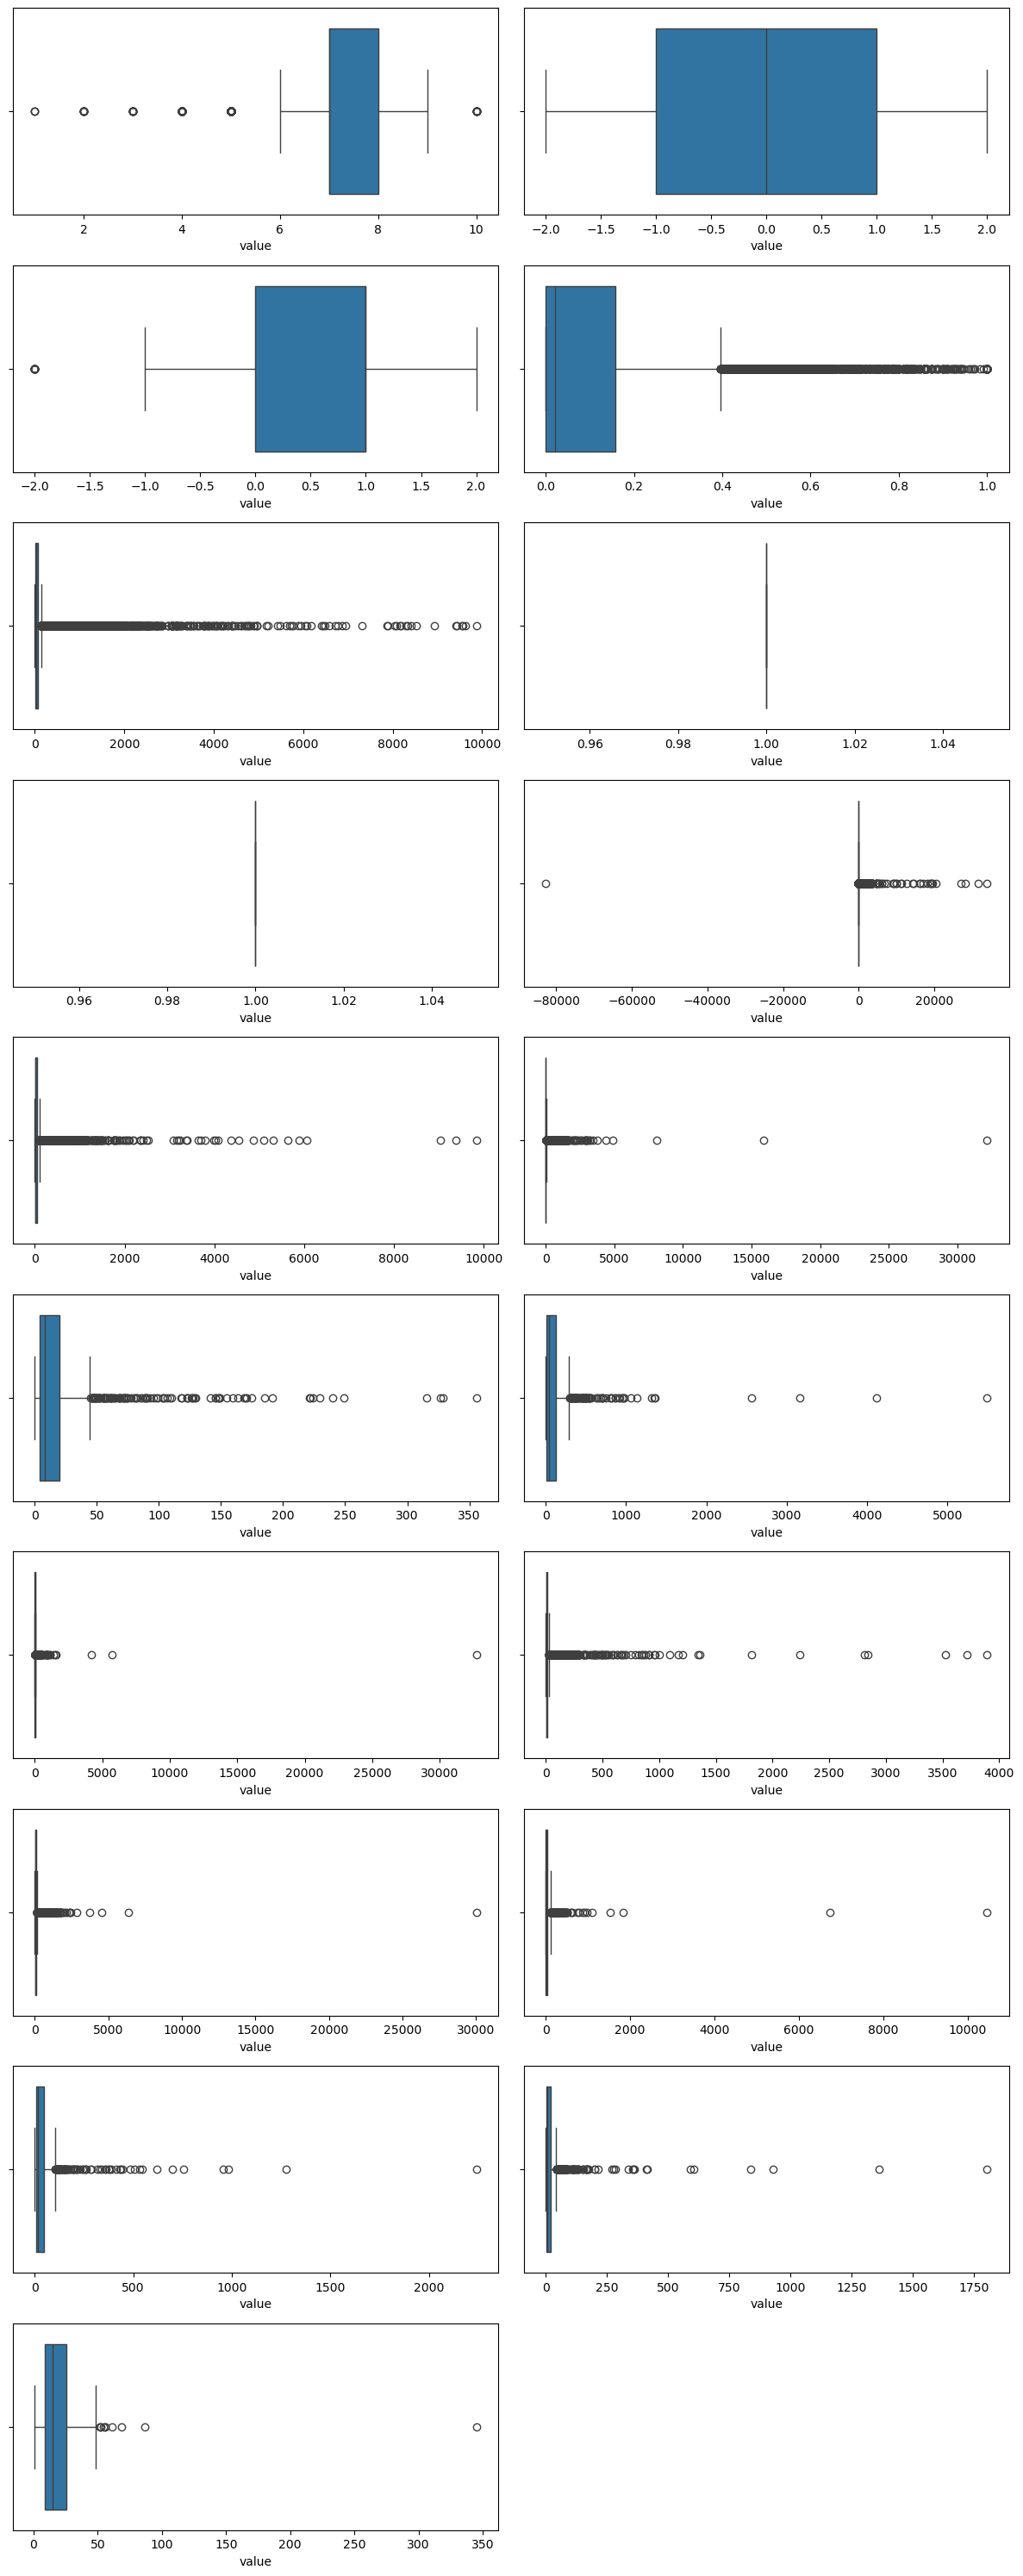

                      missing_count  zero_count
variable                                       
activity                          0        9835
appCat.builtin                    0           0
appCat.communication              0           0
appCat.entertainment              0           0
appCat.finance                    0           0
appCat.game                       0           0
appCat.office                     0           0
appCat.other                      0           0
appCat.social                     0           0
appCat.travel                     0           0
appCat.unknown                    0           0
appCat.utilities                  0           0
appCat.weather                    0           0
call                              0           0
circumplex.arousal               46        1586
circumplex.valence              156        1307
mood                              0           0
screen                            0           0
sms                               0     

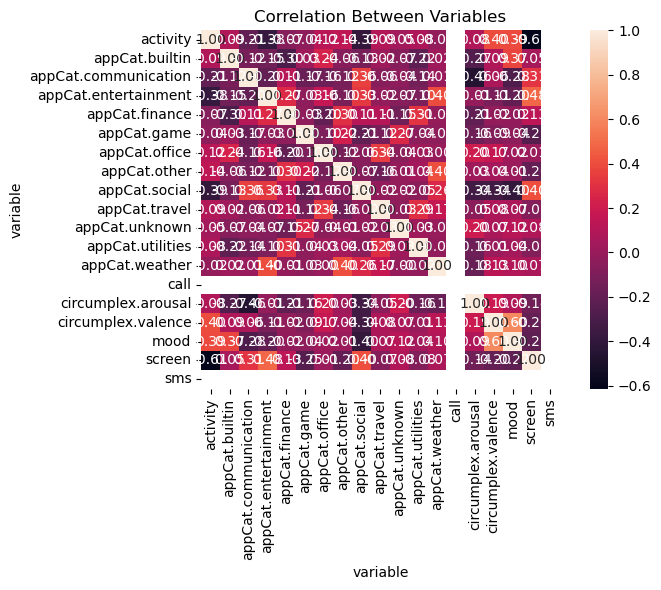

Exports written: attribute_stats.csv variable_missing_zero.csv variable_counts.xlsx


In [3]:
total_rows = df.shape[0]
distinct_vars = df['variable'].nunique()
distinct_users = df['id'].nunique()

print(f"Total records: {total_rows}")
print(f"Distinct attributes: {distinct_vars}")
print(f"Unique users: {distinct_users}")

df['date_only'] = pd.to_datetime(df['time']).dt.date
distinct_days = df['date_only'].nunique()

print(f"Number of days recorded: {distinct_days}")

summary_stats = (
    df
    .groupby('variable')['value']
    .describe()
    .reset_index()
    .rename(columns={'variable': 'Attribute'})
)

print("\nDescriptive statistics by attribute:")
print(summary_stats)

data_table = df.copy()
frequency_by_variable = data_table['variable'].value_counts()

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(frequency_by_variable.index, frequency_by_variable.values)
ax.set_title('Variable Category Distribution')
ax.set_xlabel('Variable Category')
ax.set_ylabel('Count')
ax.set_xticklabels(frequency_by_variable.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

frequency_by_variable

import seaborn as sns
import math

ts = df.groupby(['date_only', 'variable'])['value'].mean().unstack('variable')
plt.figure(figsize=(12, 6))
ts.plot(ax=plt.gca())
plt.title('Daily Mean Value by Variable')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

vars_ = df['variable'].unique()
n = len(vars_)
cols = 2
rows = math.ceil(n/cols)
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3))
axes = axes.flatten()
for ax, var in zip(axes, vars_):
    sns.boxplot(x='value', data=df[df['variable']==var], ax=ax)
for ax in axes[n:]:
    ax.set_visible(False)
plt.tight_layout()
plt.show()

missing = df['value'].isna().groupby(df['variable']).sum()
zeros = (df['value'] == 0).groupby(df['variable']).sum()
miss_zero = pd.DataFrame({'missing_count': missing, 'zero_count': zeros})
print(miss_zero)

user_summary = df.groupby('id').agg(
    total_records=('value', 'count'),
    first_day=('date_only', 'min'),
    last_day=('date_only', 'max'),
    value_std=('value', 'std')
).reset_index()
print(user_summary)

pivot = df.pivot_table(index='date_only', columns='variable', values='value', aggfunc='mean')
corr = pivot.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title('Correlation Between Variables')
plt.tight_layout()
plt.show()

summary_stats.to_csv('attribute_stats.csv', index=False)
miss_zero.to_csv('variable_missing_zero.csv')
frequency_by_variable.to_frame('count').to_excel('variable_counts.xlsx')
print('Exports written:', 'attribute_stats.csv', 'variable_missing_zero.csv', 'variable_counts.xlsx')


Unique days per user:
    user_id  unique_day_count
0   AS14.01                72
1   AS14.02                68
2   AS14.03                77
3   AS14.05                70
4   AS14.06                74
5   AS14.07                50
6   AS14.08                67
7   AS14.09                71
8   AS14.12                67
9   AS14.13                72
10  AS14.14                72
11  AS14.15                79
12  AS14.16                74
13  AS14.17                75
14  AS14.19                73
15  AS14.20                66
16  AS14.23                63
17  AS14.24                62
18  AS14.25                75
19  AS14.26               100
20  AS14.27                80
21  AS14.28                58
22  AS14.29                73
23  AS14.30                70
24  AS14.31                78
25  AS14.32                86
26  AS14.33               101


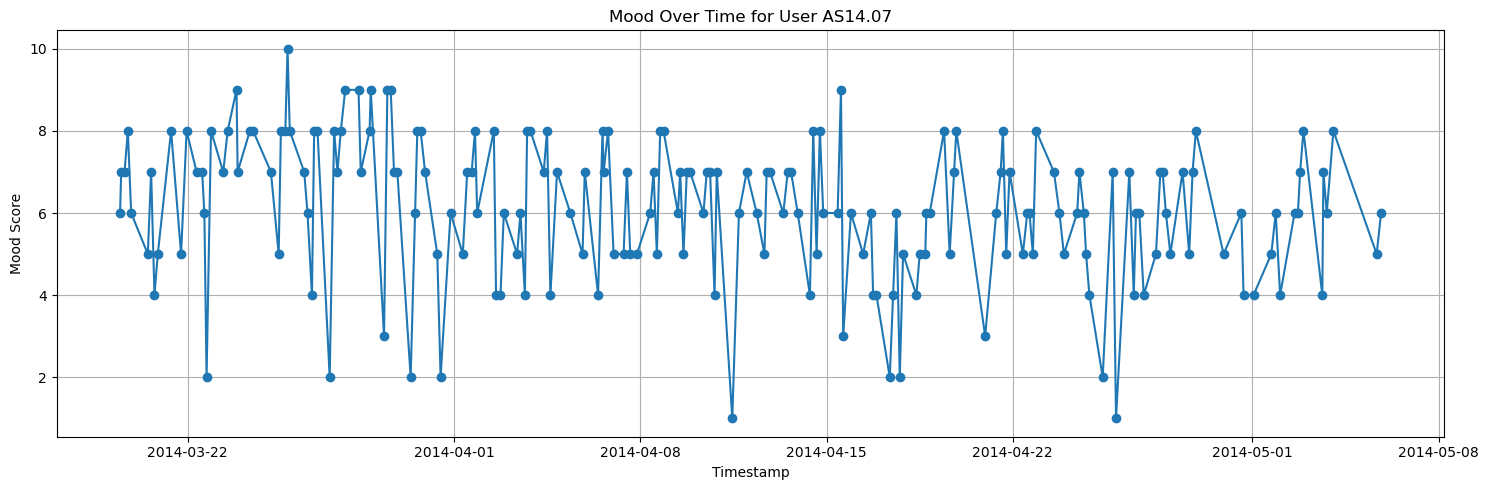

Top 5 users by unique days:
    user_id  unique_day_count
26  AS14.33               101
19  AS14.26               100
25  AS14.32                86
20  AS14.27                80
11  AS14.15                79


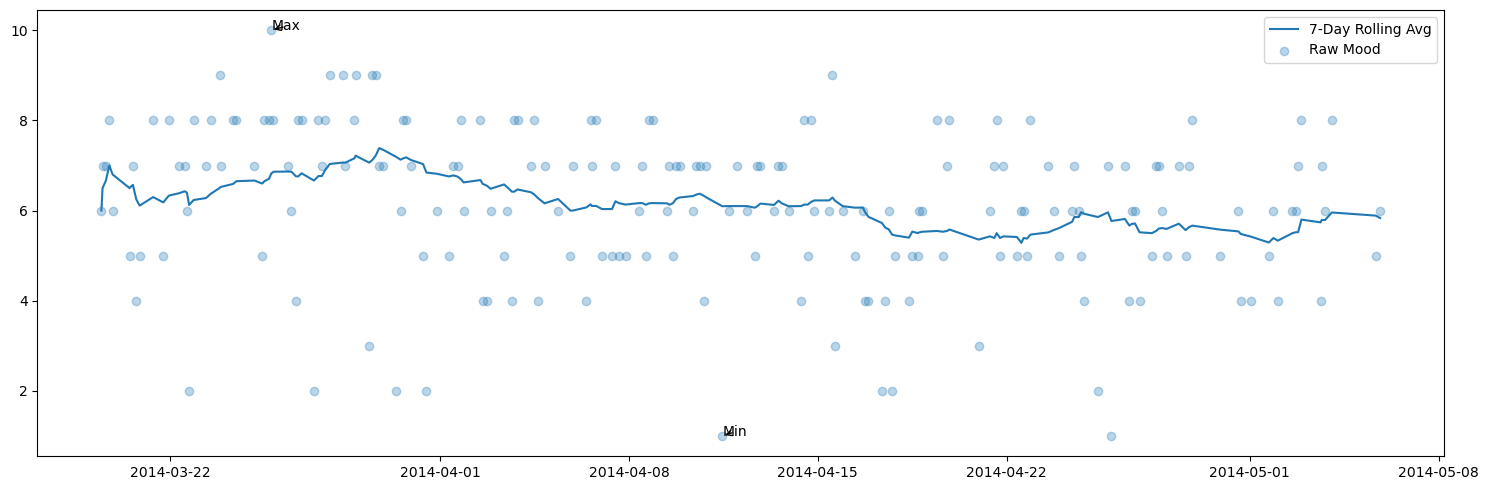

In [4]:
work_df = df.rename(columns={'id': 'user_id', 'time': 'timestamp'}).copy()
work_df['timestamp'] = pd.to_datetime(work_df['timestamp'])
user_day_summary = (
    work_df
      .assign(date_only=work_df['timestamp'].dt.date)
      .groupby('user_id')['date_only']
      .nunique()
      .reset_index(name='unique_day_count')
)
print("Unique days per user:")
print(user_day_summary)

mood_entries = work_df[work_df['variable'] == 'mood'].copy()
sixth_user = mood_entries['user_id'].unique()[5]
user_mood_trace = mood_entries[mood_entries['user_id'] == sixth_user]
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(
    user_mood_trace['timestamp'],
    user_mood_trace['value'],
    marker='o',
    linestyle='-'
)
ax.set_title(f"Mood Over Time for User {sixth_user}")
ax.set_xlabel("Timestamp")
ax.set_ylabel("Mood Score")
ax.grid(True)
plt.tight_layout()
plt.show()

top_users = user_day_summary.sort_values('unique_day_count', ascending=False).head(5)
print("Top 5 users by unique days:")
print(top_users)

user_day_summary.to_csv('user_day_summary.csv', index=False)

user_mood_trace = user_mood_trace.set_index('timestamp').sort_index()
user_mood_trace['rolling_mood'] = user_mood_trace['value'].rolling('7D').mean()
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(user_mood_trace.index, user_mood_trace['rolling_mood'], label='7‑Day Rolling Avg')
ax.scatter(user_mood_trace.index, user_mood_trace['value'], alpha=0.3, label='Raw Mood')
max_idx = user_mood_trace['value'].idxmax()
min_idx = user_mood_trace['value'].idxmin()
ax.annotate('Max', xy=(max_idx, user_mood_trace.loc[max_idx, 'value']), arrowprops=dict(arrowstyle='->'))
ax.annotate('Min', xy=(min_idx, user_mood_trace.loc[min_idx, 'value']), arrowprops=dict(arrowstyle='->'))
ax.legend()
plt.tight_layout()
plt.show()


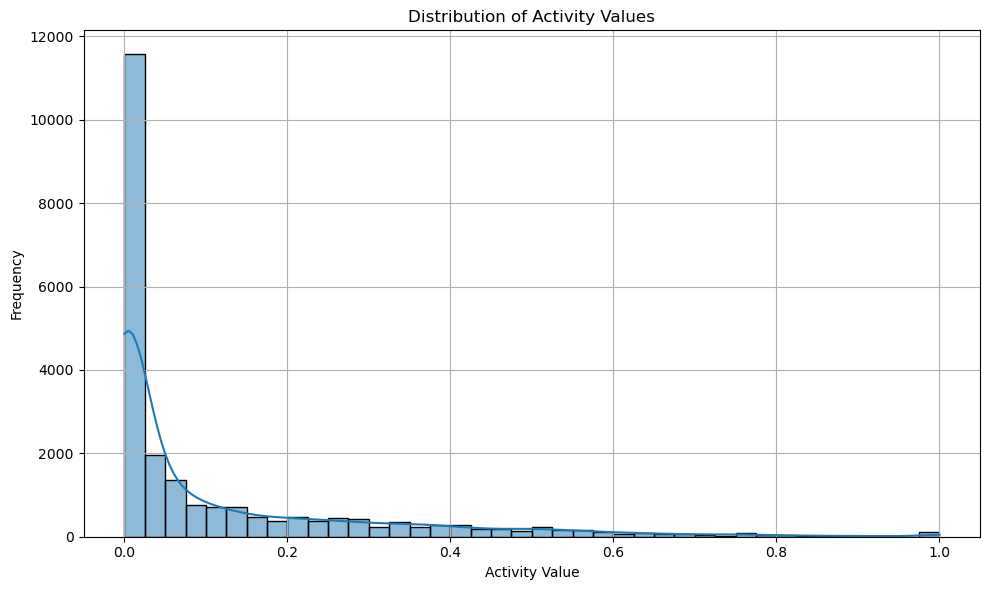

Mean: 0.12, Median: 0.02, Std: 0.19, Q1: 0.00, Q3: 0.16


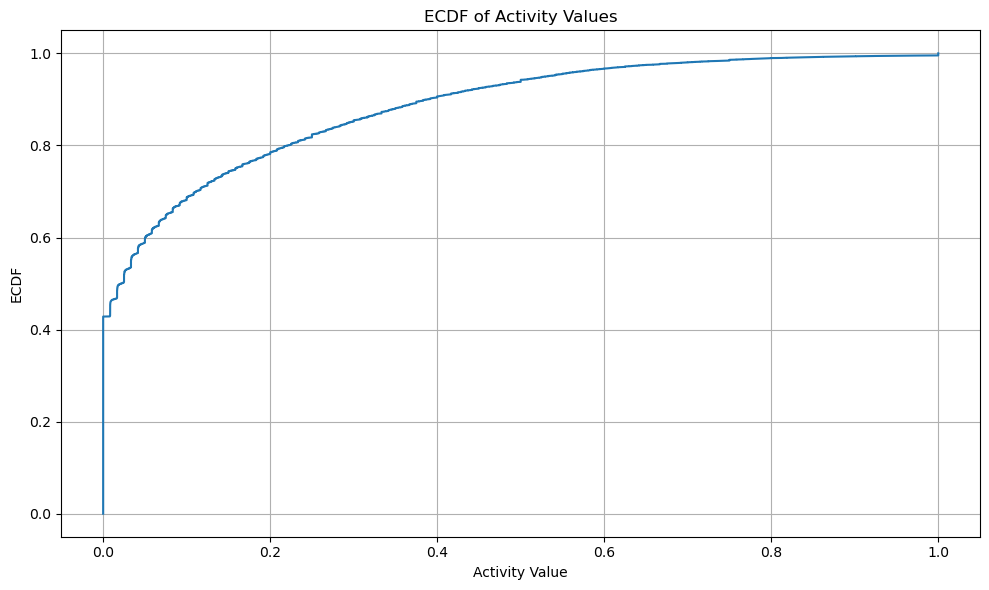

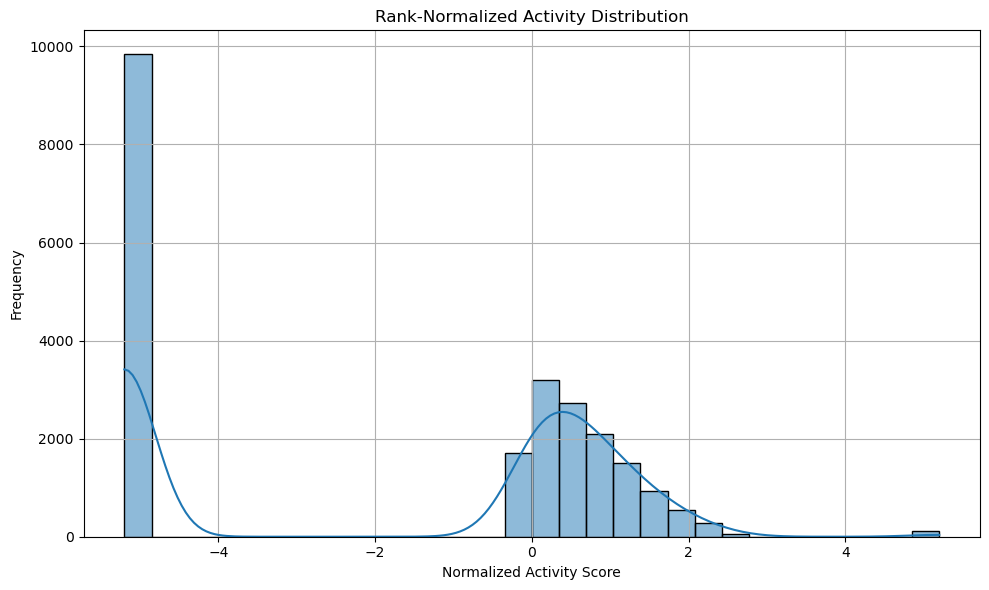

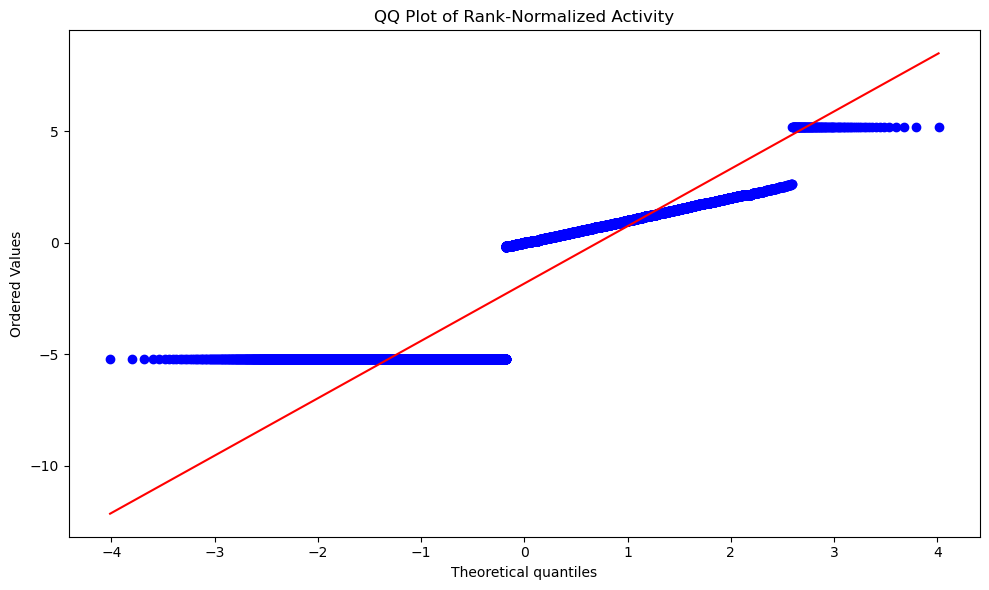

In [5]:
data_snapshot = df.copy()
activity_values = data_snapshot.loc[data_snapshot['variable'] == 'activity', 'value']
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(activity_values, bins=40, kde=True, ax=ax)
ax.set_title('Distribution of Activity Values')
ax.set_xlabel('Activity Value')
ax.set_ylabel('Frequency')
ax.grid(True)
plt.tight_layout()
plt.show()

mean_val = activity_values.mean()
median_val = activity_values.median()
std_val = activity_values.std()
q1, q3 = activity_values.quantile([0.25, 0.75])
print(f"Mean: {mean_val:.2f}, Median: {median_val:.2f}, Std: {std_val:.2f}, Q1: {q1:.2f}, Q3: {q3:.2f}")

ecdf = ECDF(activity_values)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ecdf.x, ecdf.y)
ax.set_title('ECDF of Activity Values')
ax.set_xlabel('Activity Value')
ax.set_ylabel('ECDF')
ax.grid(True)
plt.tight_layout()
plt.show()

temp_df = df.copy()
activity_raw = temp_df.loc[temp_df['variable'] == 'activity', 'value']
rank_transformer = QuantileTransformer(output_distribution='normal', n_quantiles=1000, random_state=42)
activity_normalized = rank_transformer.fit_transform(activity_raw.values.reshape(-1, 1)).flatten()
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(activity_normalized, bins=30, kde=True, ax=ax)
ax.set_title('Rank‑Normalized Activity Distribution')
ax.set_xlabel('Normalized Activity Score')
ax.set_ylabel('Frequency')
ax.grid(True)
plt.tight_layout()
plt.show()

scaler = StandardScaler()
activity_z = scaler.fit_transform(activity_raw.values.reshape(-1, 1)).flatten()
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(activity_normalized, dist="norm", plot=ax)
ax.set_title('QQ Plot of Rank‑Normalized Activity')
plt.tight_layout()
plt.show()


User AS14.02 on 2015-05-23: Screen time = 0.0, AppCat time = 0.0


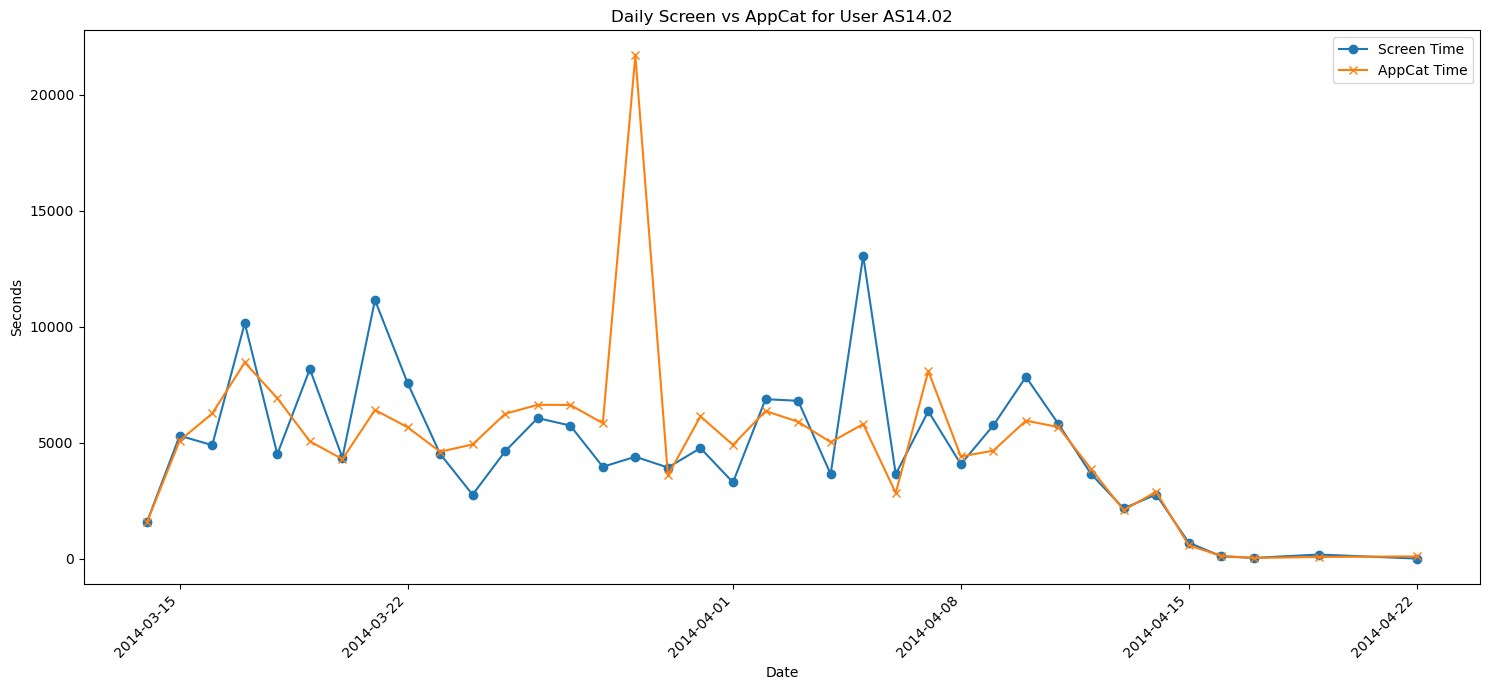

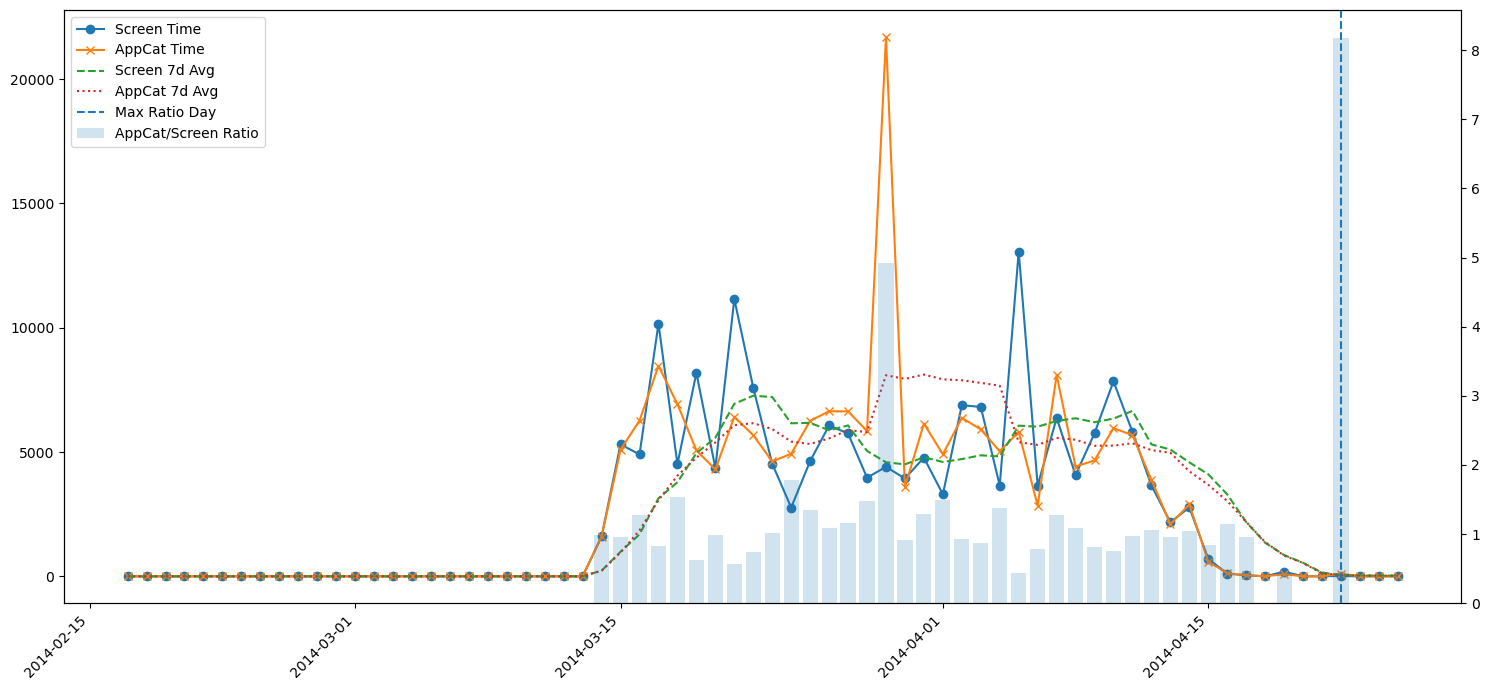

Top 5 users by total screen time:
    user_id   total_screen
23  AS14.30  625504.295005
0   AS14.01  548039.268998
16  AS14.23  492091.252999
26  AS14.33  479819.761994
5   AS14.07  416879.950008


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

clean_df = df.rename(columns={'id':'user_id','time':'timestamp'}).assign(timestamp=lambda d: pd.to_datetime(d['timestamp'])).copy()
screen_records = clean_df[clean_df['variable']=='screen']
appcat_records = clean_df[clean_df['variable'].str.contains('appCat')]

target_user = 'AS14.02'
target_date = pd.to_datetime('2015-05-23').date()
today_screen = screen_records.loc[
    (screen_records['user_id']==target_user)&
    (screen_records['timestamp'].dt.date==target_date),
    'value'
].sum()
today_appcat = appcat_records.loc[
    (appcat_records['user_id']==target_user)&
    (appcat_records['timestamp'].dt.date==target_date),
    'value'
].sum()
print(f"User {target_user} on {target_date}: Screen time = {today_screen}, AppCat time = {today_appcat}")

user_screen = screen_records[screen_records['user_id']==target_user]
user_appcat = appcat_records[appcat_records['user_id']==target_user]
screen_daily = user_screen.assign(day=user_screen['timestamp'].dt.date).groupby('day')['value'].sum().reset_index(name='screen_total')
appcat_daily = user_appcat.assign(day=user_appcat['timestamp'].dt.date).groupby('day')['value'].sum().reset_index(name='appcat_total')
daily_totals = pd.merge(screen_daily, appcat_daily, on='day', how='outer').fillna(0).sort_values('day')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(daily_totals['day'], daily_totals['screen_total'], marker='o', label='Screen Time')
ax.plot(daily_totals['day'], daily_totals['appcat_total'], marker='x', label='AppCat Time')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title(f"Daily Screen vs AppCat for User {target_user}")
ax.set_xlabel("Date")
ax.set_ylabel("Seconds")
ax.legend()
plt.tight_layout()
plt.show()

daily_pivot = (
    clean_df[clean_df['user_id']==target_user]
    .assign(day=lambda d: d['timestamp'].dt.date)
    .pivot_table(index='day', columns='variable', values='value', aggfunc='sum', fill_value=0)
)
daily_pivot['screen_total'] = daily_pivot.get('screen', 0)
appcat_cols = [c for c in daily_pivot.columns if 'appCat' in c]
daily_pivot['appcat_total'] = daily_pivot[appcat_cols].sum(axis=1)
daily_pivot = daily_pivot[['screen_total','appcat_total']].reset_index()
daily_pivot['ratio'] = daily_pivot['appcat_total'] / daily_pivot['screen_total'].replace(0, np.nan)
daily_pivot['screen_7d_avg'] = daily_pivot['screen_total'].rolling(7, min_periods=1).mean()
daily_pivot['appcat_7d_avg'] = daily_pivot['appcat_total'].rolling(7, min_periods=1).mean()
daily_pivot.to_csv(f'{target_user}_daily_summary.csv', index=False)

fig, ax1 = plt.subplots(figsize=(15,7))
ax1.plot(daily_pivot['day'], daily_pivot['screen_total'], marker='o', label='Screen Time')
ax1.plot(daily_pivot['day'], daily_pivot['appcat_total'], marker='x', label='AppCat Time')
ax1.plot(daily_pivot['day'], daily_pivot['screen_7d_avg'], linestyle='--', label='Screen 7d Avg')
ax1.plot(daily_pivot['day'], daily_pivot['appcat_7d_avg'], linestyle=':', label='AppCat 7d Avg')
ax2 = ax1.twinx()
ax2.bar(daily_pivot['day'], daily_pivot['ratio'], alpha=0.2, label='AppCat/Screen Ratio')
max_ratio_day = daily_pivot.loc[daily_pivot['ratio'].idxmax(), 'day']
ax2.axvline(max_ratio_day, linestyle='--', label='Max Ratio Day')
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

user_totals = screen_records.groupby('user_id')['value'].sum().reset_index(name='total_screen').sort_values('total_screen', ascending=False).head(5)
print("Top 5 users by total screen time:")
print(user_totals)


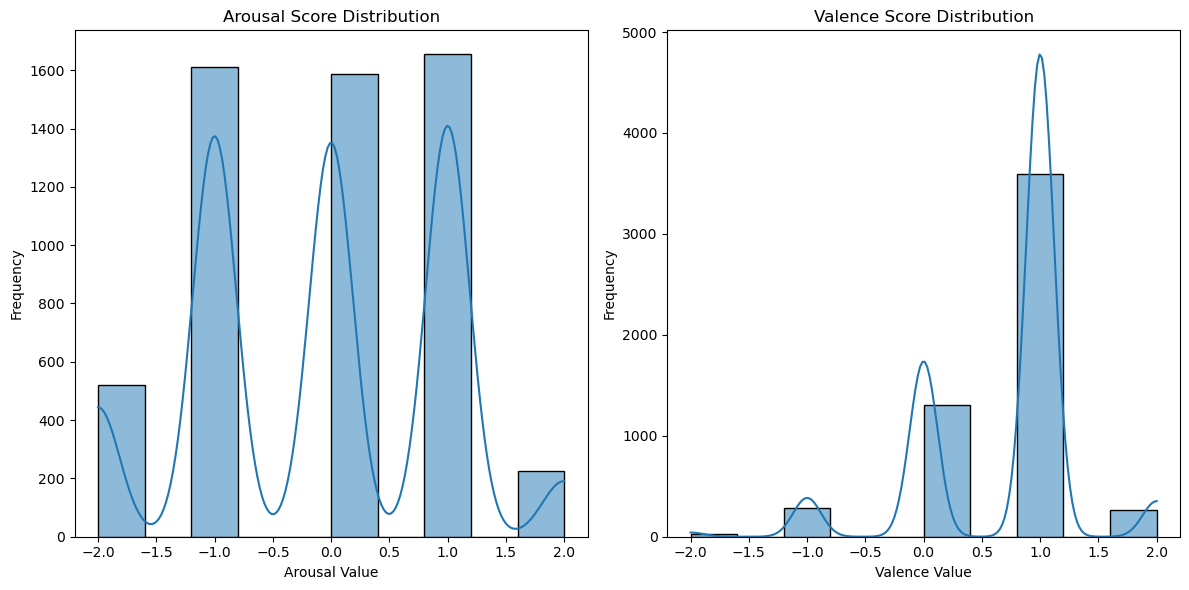

Arousal and Valence Summary Statistics:
         Arousal   Valence
Mean   -0.098624  0.687808
Median  0.000000  1.000000
Std     1.051868  0.671298
Correlation between arousal and valence: nan


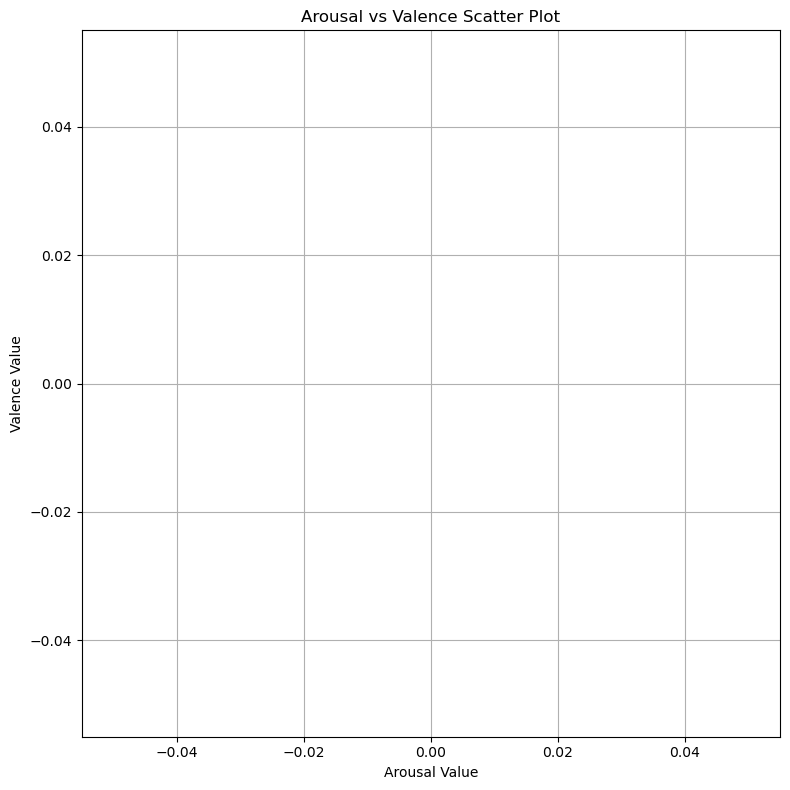

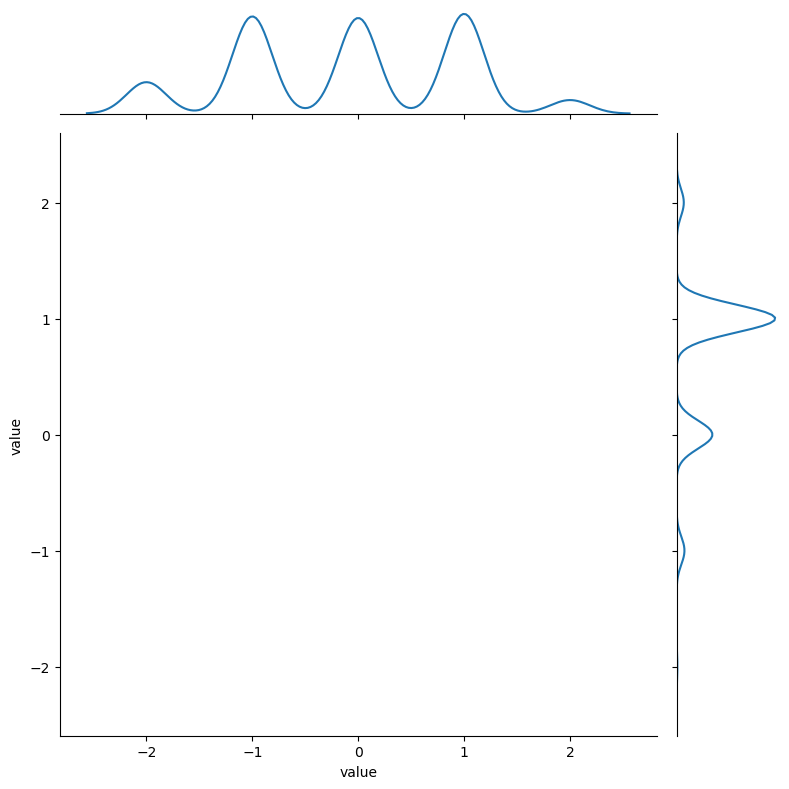

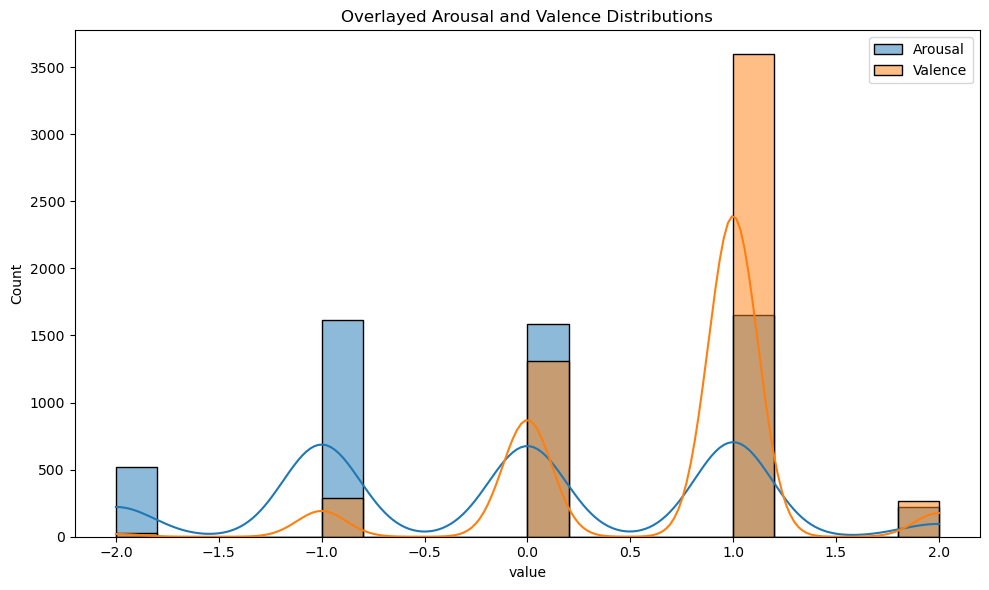

In [7]:
analysis_df = df.copy()
arousal_vals = analysis_df.loc[analysis_df['variable'] == 'circumplex.arousal', 'value']
valence_vals = analysis_df.loc[analysis_df['variable'] == 'circumplex.valence', 'value']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.histplot(arousal_vals, bins=10, kde=True, ax=axes[0])
axes[0].set_title("Arousal Score Distribution")
axes[0].set_xlabel("Arousal Value")
axes[0].set_ylabel("Frequency")

sns.histplot(valence_vals, bins=10, kde=True, ax=axes[1])
axes[1].set_title("Valence Score Distribution")
axes[1].set_xlabel("Valence Value")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

print("Arousal and Valence Summary Statistics:")
print(pd.DataFrame({
    'Arousal': [arousal_vals.mean(), arousal_vals.median(), arousal_vals.std()],
    'Valence': [valence_vals.mean(), valence_vals.median(), valence_vals.std()]
}, index=['Mean', 'Median', 'Std']))

corr = arousal_vals.corr(valence_vals)
print(f"Correlation between arousal and valence: {corr:.2f}")

plt.figure(figsize=(8, 8))
sns.scatterplot(x=arousal_vals, y=valence_vals, alpha=0.5)
plt.title("Arousal vs Valence Scatter Plot")
plt.xlabel("Arousal Value")
plt.ylabel("Valence Value")
plt.grid(True)
plt.tight_layout()
plt.show()

sns.jointplot(x=arousal_vals, y=valence_vals, kind='kde', height=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(arousal_vals, bins=20, kde=True, label='Arousal')
sns.histplot(valence_vals, bins=20, kde=True, label='Valence')
plt.title("Overlayed Arousal and Valence Distributions")
plt.legend()
plt.tight_layout()
plt.show()


## Investigate on Missing Value 

       Attribute_Name  Num_Missing
0  circumplex.arousal           46
1  circumplex.valence          156

Missing Summary with Totals and Percentages:
       Attribute_Name  Num_Missing  Total_Count  Pct_Missing
0  circumplex.valence          156         5643     2.764487
1  circumplex.arousal           46         5643     0.815169


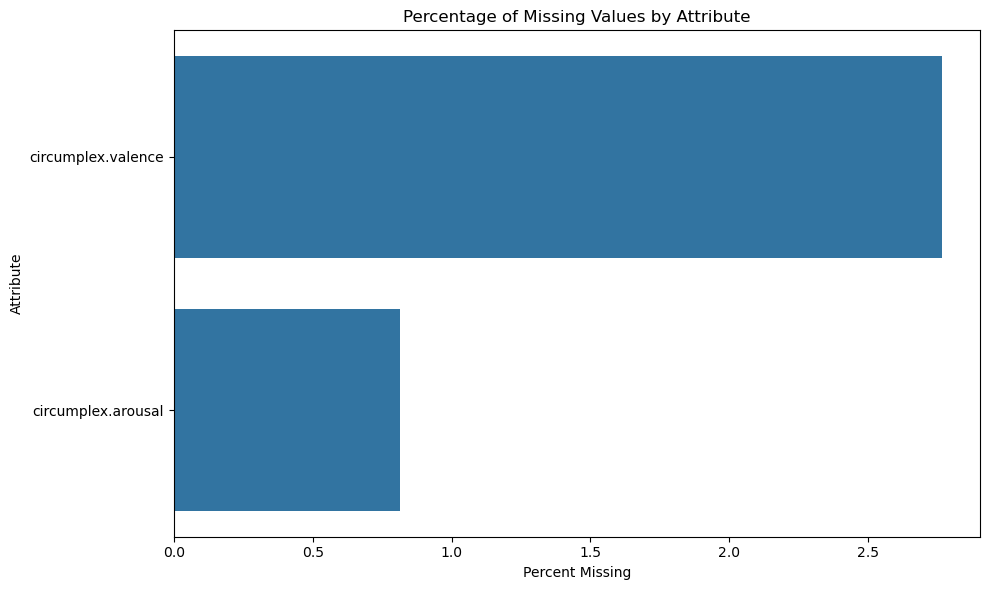


Saved missing_summary.csv


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# original steps
temp_df = df.copy()
null_entries = temp_df.loc[temp_df['value'].isna()]
missing_counts = (
    null_entries
    .groupby('variable')
    .size()
    .reset_index(name='missing_count')
)
missing_summary = missing_counts.rename(
    columns={
        'variable': 'Attribute_Name',
        'missing_count': 'Num_Missing'
    }
)
print(missing_summary)

# enhancements

# calculate total and percent missing
total_counts = df.groupby('variable').size().reset_index(name='Total_Count')
missing_summary = (
    missing_summary
    .merge(total_counts, left_on='Attribute_Name', right_on='variable', how='left')
    .drop(columns='variable')
)
missing_summary['Pct_Missing'] = (missing_summary['Num_Missing'] / missing_summary['Total_Count']) * 100

# sort and reset index
missing_summary = missing_summary.sort_values('Num_Missing', ascending=False).reset_index(drop=True)
print("\nMissing Summary with Totals and Percentages:")
print(missing_summary)

# bar plot of percent missing
plt.figure(figsize=(10, 6))
sns.barplot(
    data=missing_summary,
    y='Attribute_Name',
    x='Pct_Missing',
    order=missing_summary['Attribute_Name']
)
plt.title('Percentage of Missing Values by Attribute')
plt.xlabel('Percent Missing')
plt.ylabel('Attribute')
plt.tight_layout()
plt.show()

# save results
missing_summary.to_csv('missing_summary.csv', index=False)
print("\nSaved missing_summary.csv")


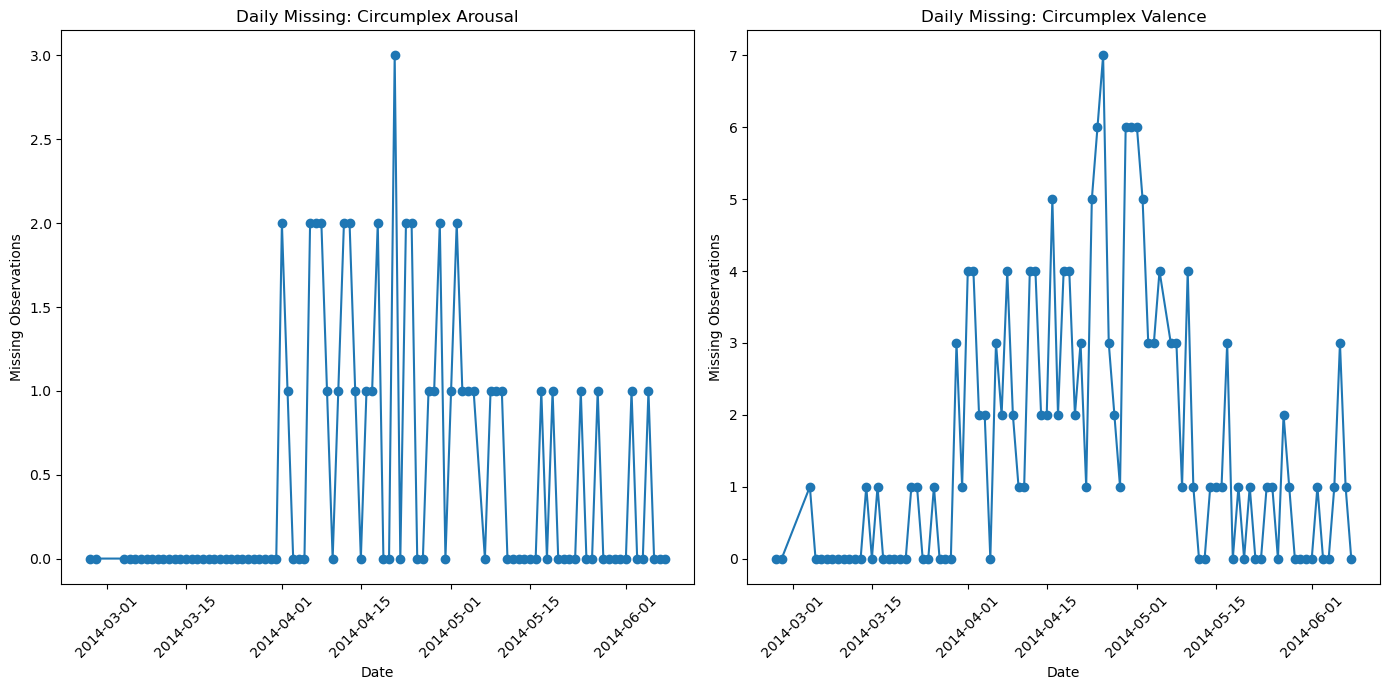

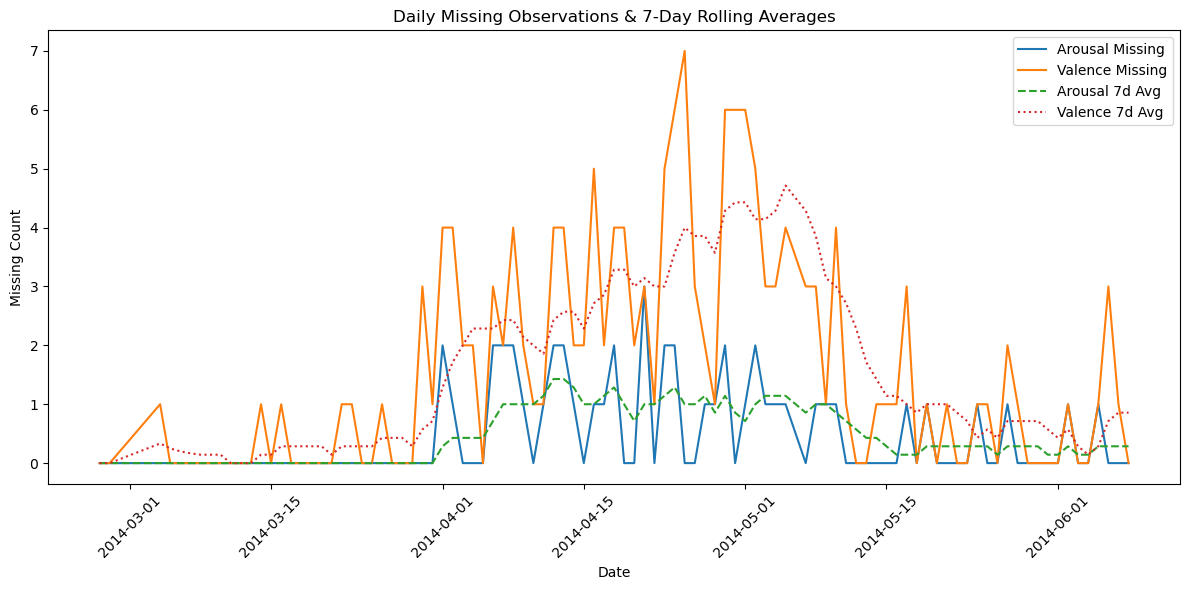

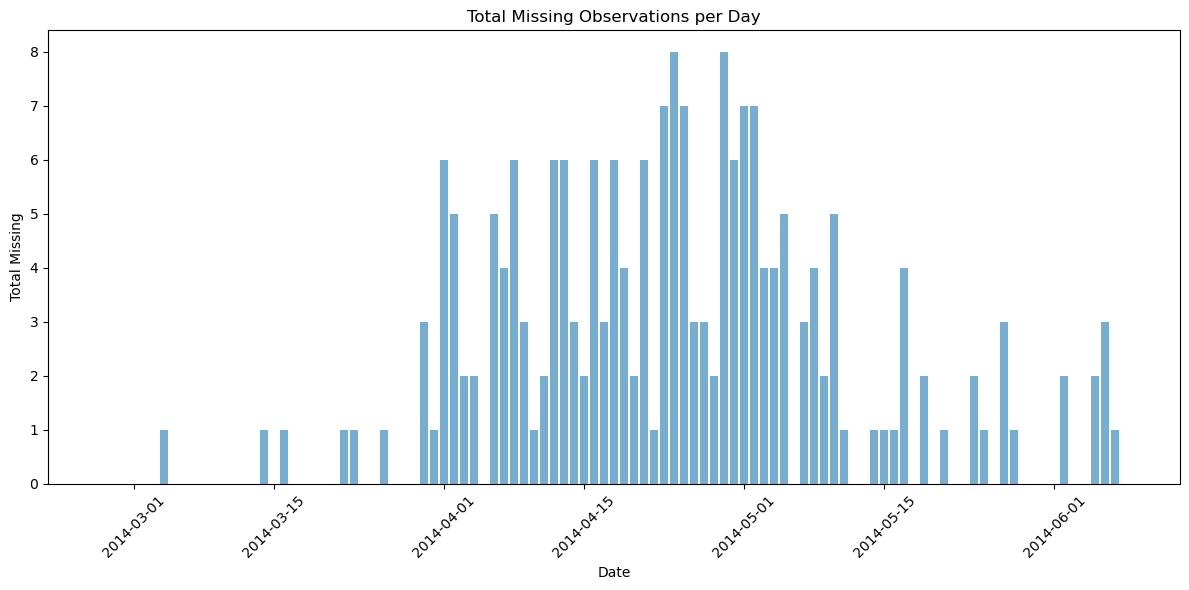

Correlation between daily arousal and valence missing counts: 0.63
       arousal_missing_count  valence_missing_count  total_missing
count              98.000000              98.000000      98.000000
mean                0.469388               1.591837       2.061224
std                 0.735044               1.809692       2.345499
min                 0.000000               0.000000       0.000000
25%                 0.000000               0.000000       0.000000
50%                 0.000000               1.000000       1.000000
75%                 1.000000               3.000000       3.000000
max                 3.000000               7.000000       8.000000
Exported missing_daily to circumplex_missing_summary.csv


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

work_df = df.rename(columns={'time':'timestamp'}).copy()
work_df['timestamp'] = pd.to_datetime(work_df['timestamp'])

arousal_df = work_df.query("variable == 'circumplex.arousal'").copy()
valence_df = work_df.query("variable == 'circumplex.valence'").copy()

arousal_df['missing_flag'] = arousal_df['value'].isna().astype(int)
valence_df['missing_flag'] = valence_df['value'].isna().astype(int)

arousal_missing_daily = arousal_df.groupby(arousal_df['timestamp'].dt.date)['missing_flag']\
    .sum().reset_index(name='arousal_missing_count')
valence_missing_daily = valence_df.groupby(valence_df['timestamp'].dt.date)['missing_flag']\
    .sum().reset_index(name='valence_missing_count')

fig, axes = plt.subplots(ncols=2, figsize=(14, 7))
axes[0].plot(arousal_missing_daily['timestamp'], arousal_missing_daily['arousal_missing_count'], marker='o', linestyle='-')
axes[0].set_title('Daily Missing: Circumplex Arousal')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Missing Observations')
axes[0].tick_params(axis='x', rotation=45)
axes[1].plot(valence_missing_daily['timestamp'], valence_missing_daily['valence_missing_count'], marker='o', linestyle='-')
axes[1].set_title('Daily Missing: Circumplex Valence')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Missing Observations')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

missing_daily = pd.merge(arousal_missing_daily, valence_missing_daily, on='timestamp', how='outer')\
    .fillna(0).rename(columns={'timestamp':'date'})
missing_daily['total_missing'] = missing_daily['arousal_missing_count'] + missing_daily['valence_missing_count']
missing_daily['arousal_7d_avg'] = missing_daily['arousal_missing_count'].rolling(7, min_periods=1).mean()
missing_daily['valence_7d_avg'] = missing_daily['valence_missing_count'].rolling(7, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(missing_daily['date'], missing_daily['arousal_missing_count'], label='Arousal Missing')
ax.plot(missing_daily['date'], missing_daily['valence_missing_count'], label='Valence Missing')
ax.plot(missing_daily['date'], missing_daily['arousal_7d_avg'], linestyle='--', label='Arousal 7d Avg')
ax.plot(missing_daily['date'], missing_daily['valence_7d_avg'], linestyle=':', label='Valence 7d Avg')
ax.set_title('Daily Missing Observations & 7‑Day Rolling Averages')
ax.set_xlabel('Date')
ax.set_ylabel('Missing Count')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(missing_daily['date'], missing_daily['total_missing'], alpha=0.6)
ax.set_title('Total Missing Observations per Day')
ax.set_xlabel('Date')
ax.set_ylabel('Total Missing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

corr = missing_daily['arousal_missing_count'].corr(missing_daily['valence_missing_count'])
print(f"Correlation between daily arousal and valence missing counts: {corr:.2f}")
print(missing_daily[['arousal_missing_count','valence_missing_count','total_missing']].describe())

missing_daily.to_csv('circumplex_missing_summary.csv', index=False)
print("Exported missing_daily to circumplex_missing_summary.csv")


In [10]:
# arousal_missing[arousal_missing["is_missing"]==1]

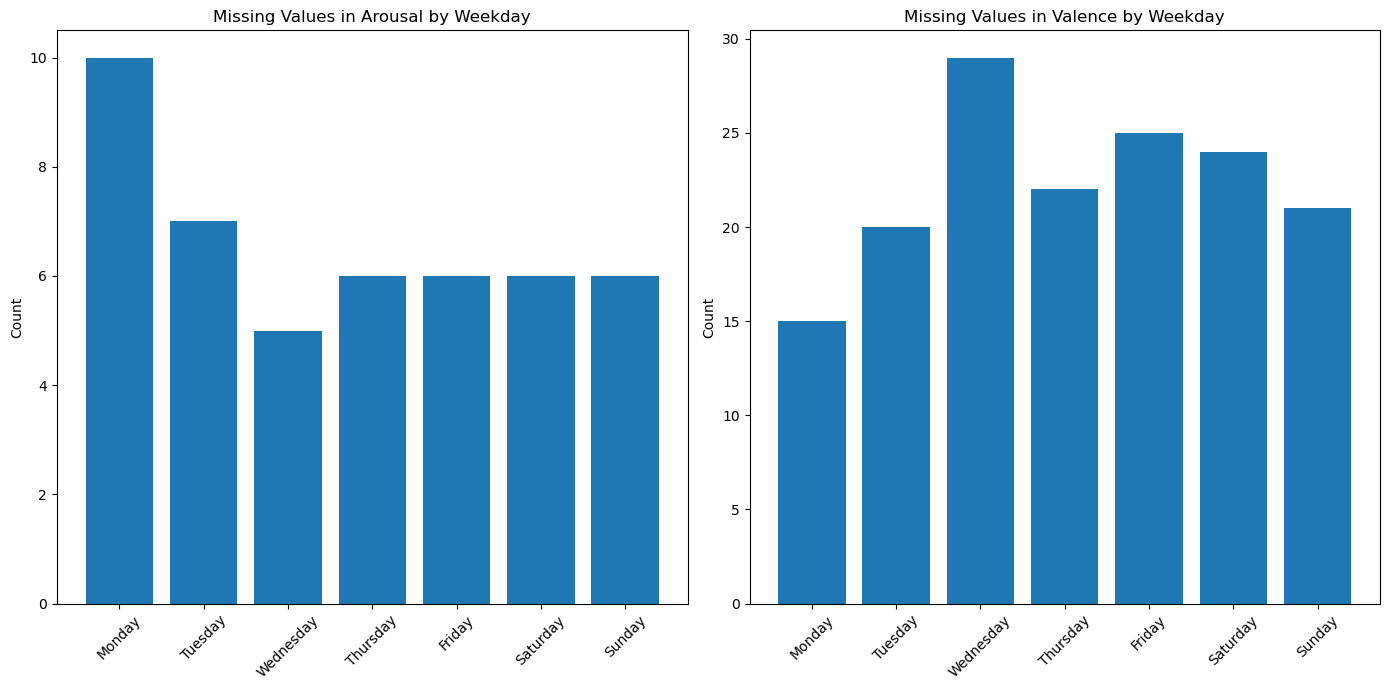

     weekday  missing_count_arousal  missing_count_valence  total_missing  \
0     Monday                     10                     15             25   
1    Tuesday                      7                     20             27   
2  Wednesday                      5                     29             34   
3   Thursday                      6                     22             28   
4     Friday                      6                     25             31   
5   Saturday                      6                     24             30   
6     Sunday                      6                     21             27   

   pct_missing_arousal  pct_missing_valence  
0            40.000000            60.000000  
1            25.925926            74.074074  
2            14.705882            85.294118  
3            21.428571            78.571429  
4            19.354839            80.645161  
5            20.000000            80.000000  
6            22.222222            77.777778  


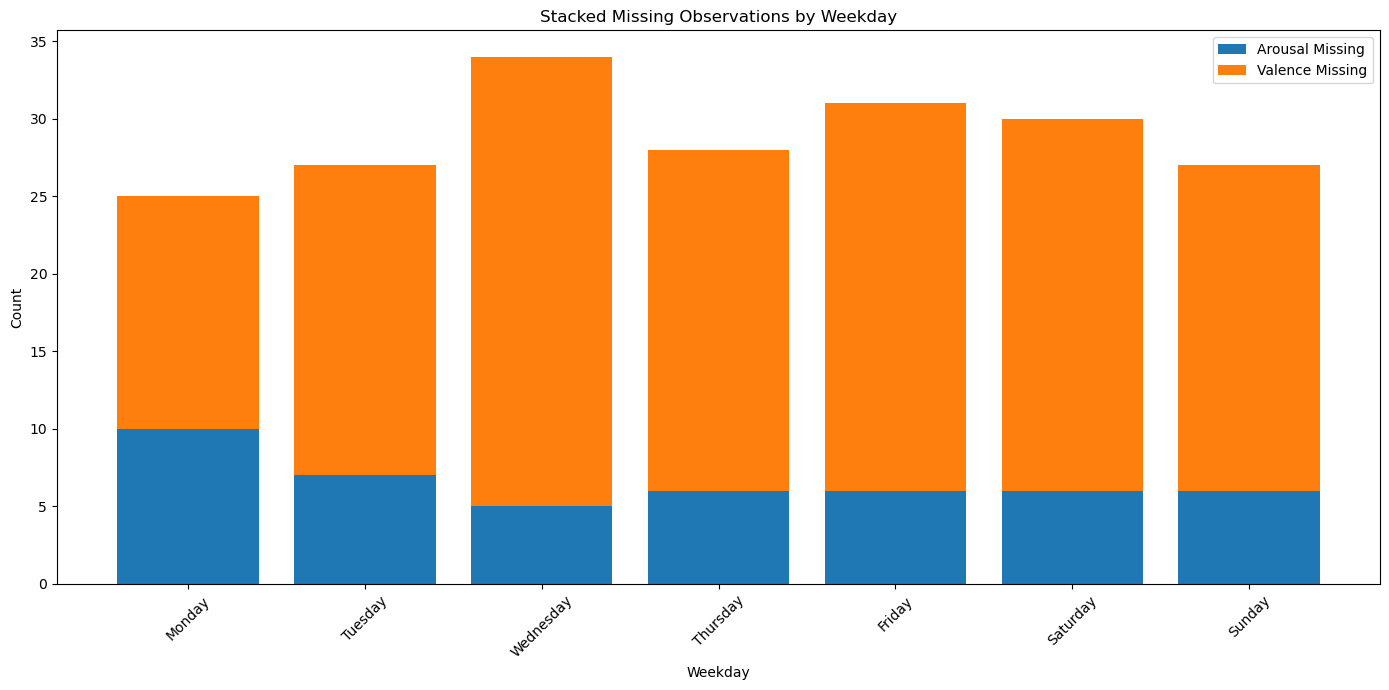

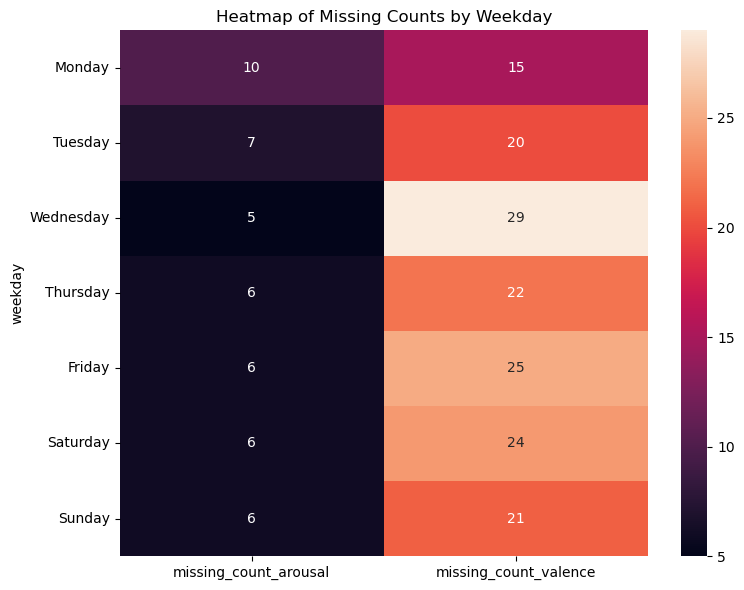

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

processed_df = df.rename(columns={'time':'timestamp'}).copy()
processed_df['timestamp'] = pd.to_datetime(processed_df['timestamp'])
processed_df['weekday'] = processed_df['timestamp'].dt.day_name()

arousal_df = processed_df.query("variable=='circumplex.arousal'")\
    .assign(missing_flag=lambda d: d['value'].isna().astype(int))
valence_df = processed_df.query("variable=='circumplex.valence'")\
    .assign(missing_flag=lambda d: d['value'].isna().astype(int))

weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

arousal_missing_by_wd = arousal_df.groupby('weekday')['missing_flag']\
    .sum().reindex(weekday_order).reset_index(name='missing_count')
valence_missing_by_wd = valence_df.groupby('weekday')['missing_flag']\
    .sum().reindex(weekday_order).reset_index(name='missing_count')

fig, axes = plt.subplots(ncols=2, figsize=(14,7))
axes[0].bar(arousal_missing_by_wd['weekday'], arousal_missing_by_wd['missing_count'])
axes[0].set_title('Missing Values in Arousal by Weekday')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[1].bar(valence_missing_by_wd['weekday'], valence_missing_by_wd['missing_count'])
axes[1].set_title('Missing Values in Valence by Weekday')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

missing_by_wd = arousal_missing_by_wd.merge(valence_missing_by_wd, on='weekday', suffixes=('_arousal','_valence'))
missing_by_wd['total_missing'] = missing_by_wd['missing_count_arousal'] + missing_by_wd['missing_count_valence']
missing_by_wd['pct_missing_arousal'] = missing_by_wd['missing_count_arousal'] / missing_by_wd['total_missing'] * 100
missing_by_wd['pct_missing_valence'] = missing_by_wd['missing_count_valence'] / missing_by_wd['total_missing'] * 100
print(missing_by_wd)
missing_by_wd.to_csv('weekday_missing_summary.csv', index=False)

fig, ax = plt.subplots(figsize=(14,7))
ax.bar(missing_by_wd['weekday'], missing_by_wd['missing_count_arousal'], label='Arousal Missing')
ax.bar(missing_by_wd['weekday'], missing_by_wd['missing_count_valence'], bottom=missing_by_wd['missing_count_arousal'], label='Valence Missing')
ax.set_title('Stacked Missing Observations by Weekday')
ax.set_xlabel('Weekday')
ax.set_ylabel('Count')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

heatmap_df = missing_by_wd.set_index('weekday')[['missing_count_arousal','missing_count_valence']]
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(heatmap_df, annot=True, fmt='d')
ax.set_title('Heatmap of Missing Counts by Weekday')
plt.tight_layout()
plt.show()


Remaining missing values in Arousal: 0
Remaining missing values in Valence: 0
Missing before interpolation:
 variable
circumplex.arousal     46
circumplex.valence    156
Name: value, dtype: int64
Missing after interpolation:
 variable
circumplex.arousal    0
circumplex.valence    0
Name: value, dtype: int64


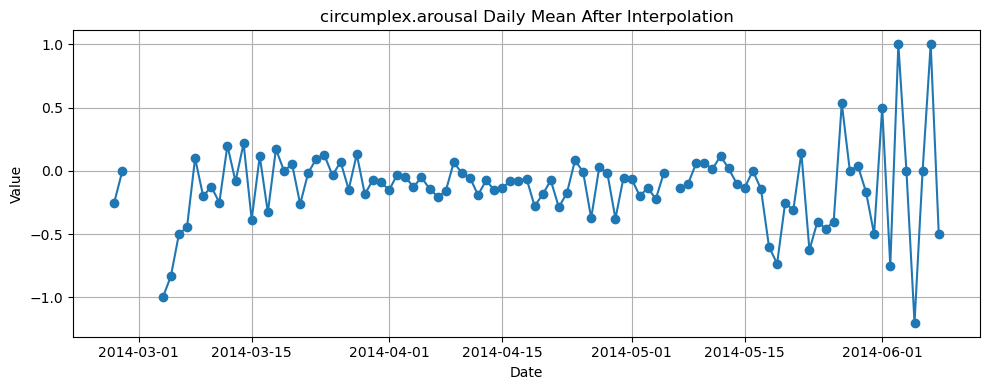

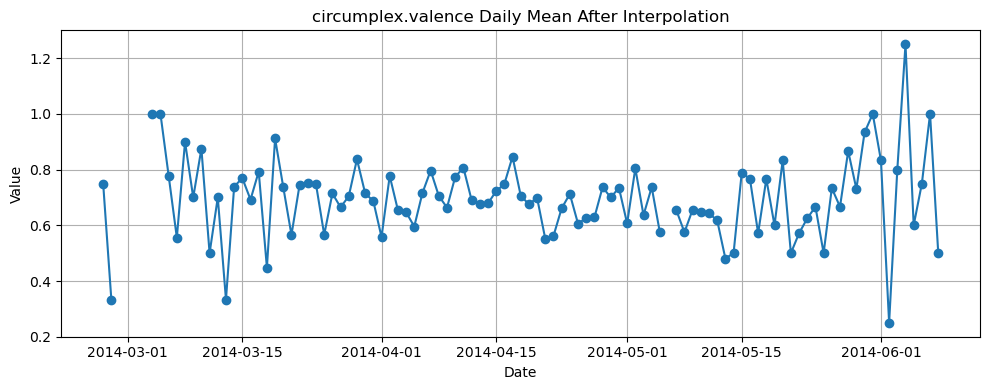

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

processed_df = df.rename(columns={'time': 'timestamp'}).copy()
processed_df['timestamp'] = pd.to_datetime(processed_df['timestamp'])

for dimension in ['circumplex.arousal', 'circumplex.valence']:
    mask = processed_df['variable'] == dimension
    interpolated = (
        processed_df.loc[mask]
        .sort_values('timestamp')['value']
        .interpolate(method='linear')
    )
    processed_df.loc[mask, 'value'] = interpolated.values

remaining_arousal_nulls = processed_df.query("variable == 'circumplex.arousal'")['value'].isna().sum()
remaining_valence_nulls = processed_df.query("variable == 'circumplex.valence'")['value'].isna().sum()

print(f"Remaining missing values in Arousal: {remaining_arousal_nulls}")
print(f"Remaining missing values in Valence: {remaining_valence_nulls}")

before_missing = df.query("variable in ['circumplex.arousal','circumplex.valence']").groupby('variable')['value'].apply(lambda x: x.isna().sum())
after_missing = processed_df.query("variable in ['circumplex.arousal','circumplex.valence']").groupby('variable')['value'].apply(lambda x: x.isna().sum())

print("Missing before interpolation:\n", before_missing)
print("Missing after interpolation:\n", after_missing)

for dimension in ['circumplex.arousal', 'circumplex.valence']:
    daily = processed_df.loc[processed_df['variable']==dimension].set_index('timestamp')['value'].resample('D').mean()
    plt.figure(figsize=(10,4))
    plt.plot(daily.index, daily.values, marker='o', linestyle='-')
    plt.title(f"{dimension} Daily Mean After Interpolation")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

processed_df.to_csv('processed_df_interpolated.csv', index=False)


## Investigate Missing Value

                 metric  violation_count  total_count  pct_violations
0        appCat.builtin                3        91288        0.003286
1  appCat.entertainment                1        27125        0.003687


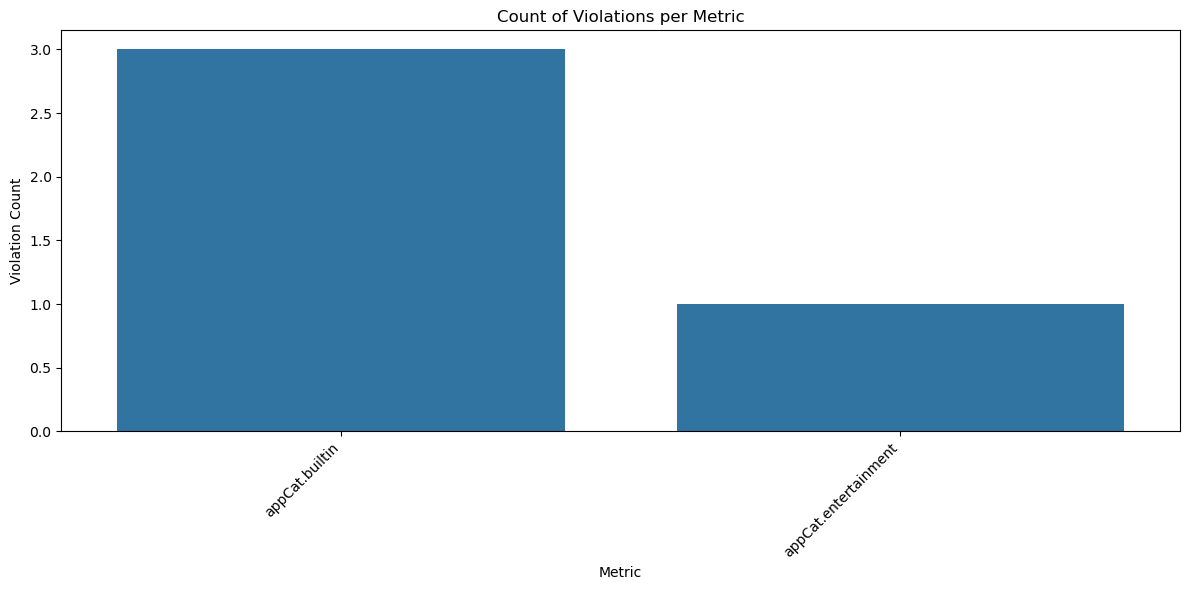

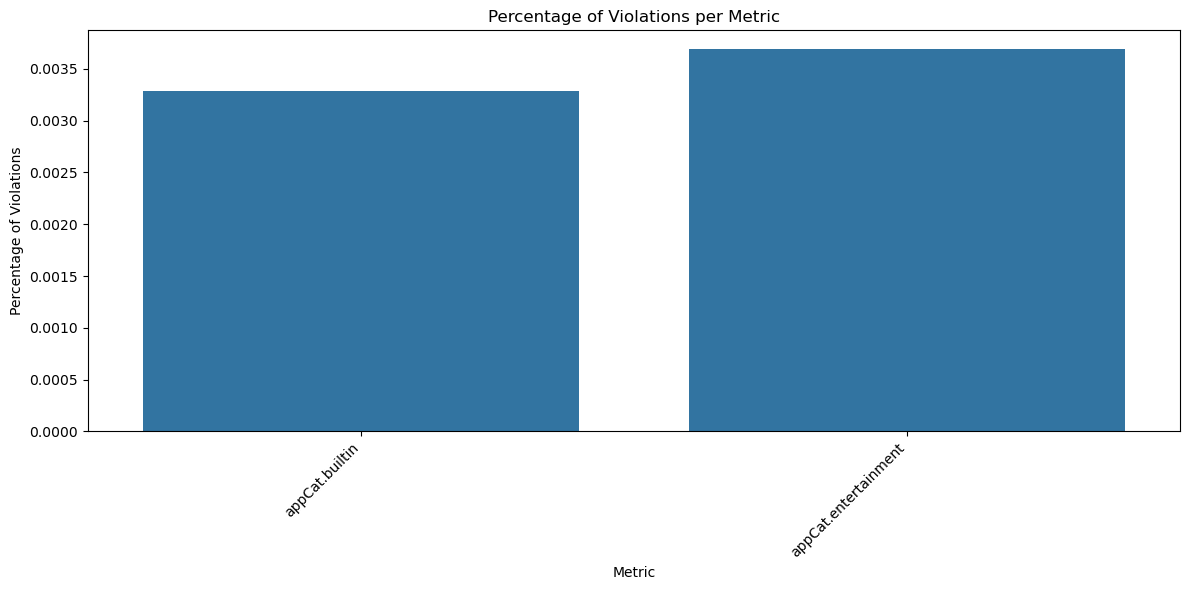

mood outliers (>3 SD): 33
circumplex.arousal outliers (>3 SD): 0
circumplex.valence outliers (>3 SD): 31
activity outliers (>3 SD): 503


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

source_df = df.rename(columns={'variable':'metric','value':'measurement'}).copy()
allowed_ranges = {
    'mood': (1, 10),
    'circumplex.arousal': (-2, 2),
    'circumplex.valence': (-2, 2),
    'activity': (0, 1),
    'call': (0, 1),
    'sms': (0, 1),
}
app_metrics = [m for m in source_df['metric'].unique() if m.startswith('appCat.')]

def extract_violations(df_in, metric_name, bounds):
    low, high = bounds
    return df_in.query(
        "metric == @metric_name and (measurement < @low or measurement > @high)"
    )

violation_records = {
    name: extract_violations(source_df, name, rng)
    for name, rng in allowed_ranges.items()
}
for name in app_metrics:
    violation_records[name] = source_df.query("metric == @name and measurement < 0")

violation_summary = {name: group.shape[0] for name, group in violation_records.items() if not group.empty}

total_counts = source_df['metric'].value_counts().to_dict()
violation_df = pd.DataFrame({
    'metric': list(violation_summary.keys()),
    'violation_count': list(violation_summary.values()),
}).assign(
    total_count=lambda d: d['metric'].map(total_counts),
)
violation_df['pct_violations'] = violation_df['violation_count'] / violation_df['total_count'] * 100
violation_df = violation_df.sort_values('violation_count', ascending=False).reset_index(drop=True)

print(violation_df)
violation_df.to_csv('violation_summary.csv', index=False)

plt.figure(figsize=(12,6))
sns.barplot(data=violation_df, x='metric', y='violation_count')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Metric')
plt.ylabel('Violation Count')
plt.title('Count of Violations per Metric')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=violation_df, x='metric', y='pct_violations')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Metric')
plt.ylabel('Percentage of Violations')
plt.title('Percentage of Violations per Metric')
plt.tight_layout()
plt.show()

continuous_metrics = ['mood','circumplex.arousal','circumplex.valence','activity']
for m in continuous_metrics:
    mask = source_df['metric'] == m
    data = source_df.loc[mask, 'measurement'].dropna()
    zs = zscore(data)
    outliers = data[abs(zs) > 3]
    print(f"{m} outliers (>3 SD): {len(outliers)}")


In [14]:
filtered_df = df.copy()
mask_error = filtered_df['variable'].str.startswith('appCat') & (filtered_df['value'] < 0)
filtered_df = filtered_df.loc[~mask_error].copy()
remaining_errors = ((filtered_df['variable'].str.startswith('appCat')) & (filtered_df['value'] < 0)).sum()
print(filtered_df.shape, remaining_errors)

error_count = mask_error.sum()
print(f"Removed {error_count} negative appCat records")

appcat_counts = filtered_df[filtered_df['variable'].str.startswith('appCat')]['variable'].value_counts()
print("AppCat counts after filtering:")
print(appcat_counts)

filtered_df['value_clipped'] = filtered_df['value'].clip(lower=0)
filtered_df.to_csv('filtered_appcat.csv', index=False)

(376908, 6) 0
Removed 4 negative appCat records
AppCat counts after filtering:
variable
appCat.builtin          91285
appCat.communication    74276
appCat.entertainment    27124
appCat.social           19145
appCat.other             7650
appCat.office            5642
appCat.travel            2846
appCat.utilities         2487
appCat.finance            939
appCat.unknown            939
appCat.game               813
appCat.weather            255
Name: count, dtype: int64


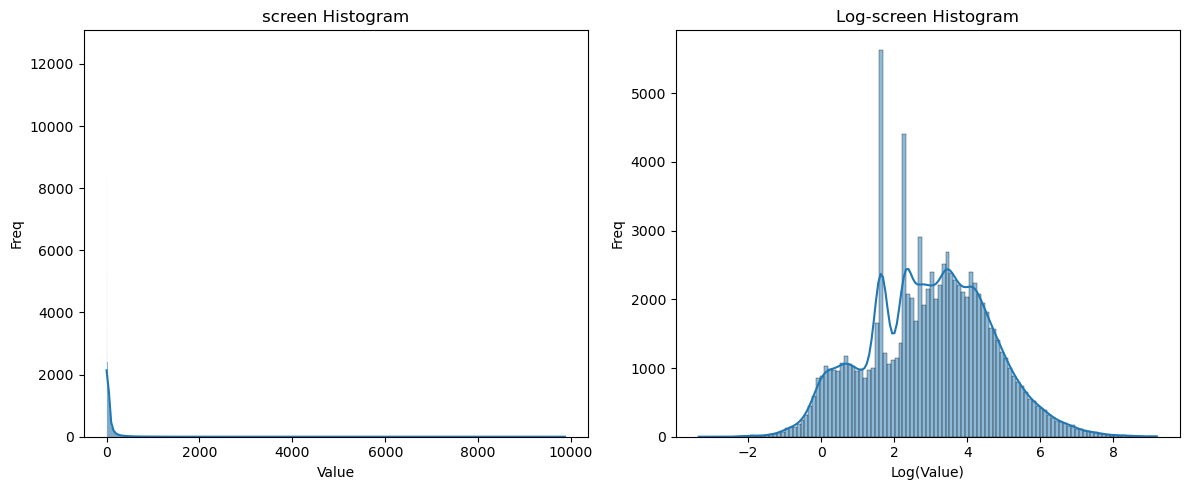


Metric: screen
 Shapiro-Wilk raw p-value: 0.0000
 Shapiro-Wilk log p-value: 0.0000
 Anderson-Darling raw stat: 1204.5003
 Anderson-Darling log stat: 3.9397

Metric: appCat.builtin
 Shapiro-Wilk raw p-value: 0.0000
 Shapiro-Wilk log p-value: 0.0000
 Anderson-Darling raw stat: 1749.5417
 Anderson-Darling log stat: 47.9511

Metric: appCat.communication
 Shapiro-Wilk raw p-value: 0.0000
 Shapiro-Wilk log p-value: 0.0000
 Anderson-Darling raw stat: 985.0351
 Anderson-Darling log stat: 12.1482

Metric: appCat.entertainment
 Shapiro-Wilk raw p-value: 0.0000
 Shapiro-Wilk log p-value: 0.0000
 Anderson-Darling raw stat: 1215.9114
 Anderson-Darling log stat: 76.8197

Metric: appCat.finance
 Shapiro-Wilk raw p-value: 0.0000
 Shapiro-Wilk log p-value: 0.0000
 Anderson-Darling raw stat: 148.7981
 Anderson-Darling log stat: 9.0112

Metric: appCat.game
 Shapiro-Wilk raw p-value: 0.0000
 Shapiro-Wilk log p-value: 0.0306
 Anderson-Darling raw stat: 145.4340
 Anderson-Darling log stat: 0.7017

Metric: 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, anderson

def evaluate_normality(series, label, show_plot=False):
    n = min(5000, len(series))
    raw_samp = series.sample(n=n, random_state=1)

    stat_raw, p_raw = shapiro(raw_samp)

    positive = series[series > 0]
    log_vals = np.log(positive)
    log_samp = log_vals.sample(n=min(5000, len(log_vals)), random_state=1)
    stat_log, p_log = shapiro(log_samp)

    ad_raw = anderson(raw_samp, dist='norm')
    ad_log = anderson(log_samp, dist='norm')

    if show_plot:
        fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
        sns.histplot(series, kde=True, ax=axes[0])
        axes[0].set(title=f'{label} Histogram', xlabel='Value', ylabel='Freq')
        sns.histplot(log_vals, kde=True, ax=axes[1])
        axes[1].set(title=f'Log-{label} Histogram', xlabel='Log(Value)', ylabel='Freq')
        plt.tight_layout()
        plt.pause(0.001)
        plt.close(fig)

    return {
        'shapiro_raw': (stat_raw, p_raw),
        'shapiro_log': (stat_log, p_log),
        'anderson_raw_stat': ad_raw.statistic,
        'anderson_log_stat': ad_log.statistic
    }

# Select variables
metrics = df.loc[df['variable'].str.startswith('appCat') | (df['variable'] == 'screen'), 'variable'].unique()

# Evaluate metrics (plot only once)
results = {}
for i, m in enumerate(metrics):
    show_plot = i == 0  # ✅ Only show for the first one
    results[m] = evaluate_normality(df.loc[df['variable'] == m, 'value'], m, show_plot=show_plot)

# Print summarized results
for m, res in results.items():
    print(f"\nMetric: {m}")
    print(f" Shapiro-Wilk raw p-value: {res['shapiro_raw'][1]:.4f}")
    print(f" Shapiro-Wilk log p-value: {res['shapiro_log'][1]:.4f}")
    print(f" Anderson-Darling raw stat: {res['anderson_raw_stat']:.4f}")
    print(f" Anderson-Darling log stat: {res['anderson_log_stat']:.4f}")


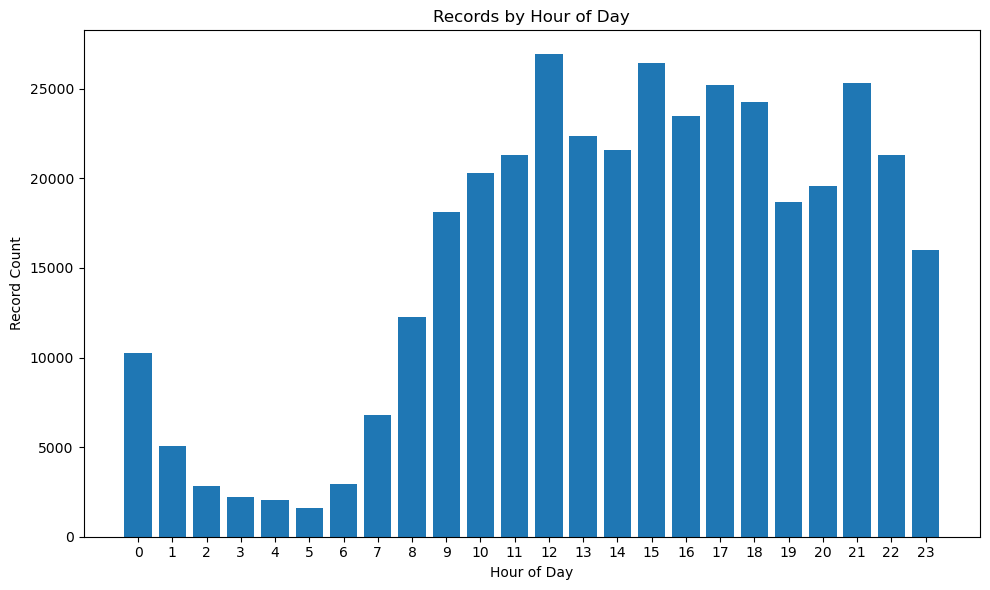

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

time_df = df.copy()
time_df['timestamp'] = pd.to_datetime(time_df['time'])
time_df['hour_of_day'] = time_df['timestamp'].dt.hour
time_df['weekday_num'] = time_df['timestamp'].dt.weekday
time_df['is_weekend'] = time_df['weekday_num'].isin([5,6]).astype(int)
time_df['part_of_day'] = pd.cut(time_df['hour_of_day'], bins=[0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'], right=False)
time_df['week_of_year'] = time_df['timestamp'].dt.isocalendar().week

hour_counts = time_df['hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel('Hour of Day')
plt.ylabel('Record Count')
plt.title('Records by Hour of Day')
plt.xticks(hour_counts.index)
plt.tight_layout()
plt.show()


## 1.3 Feature Engineering

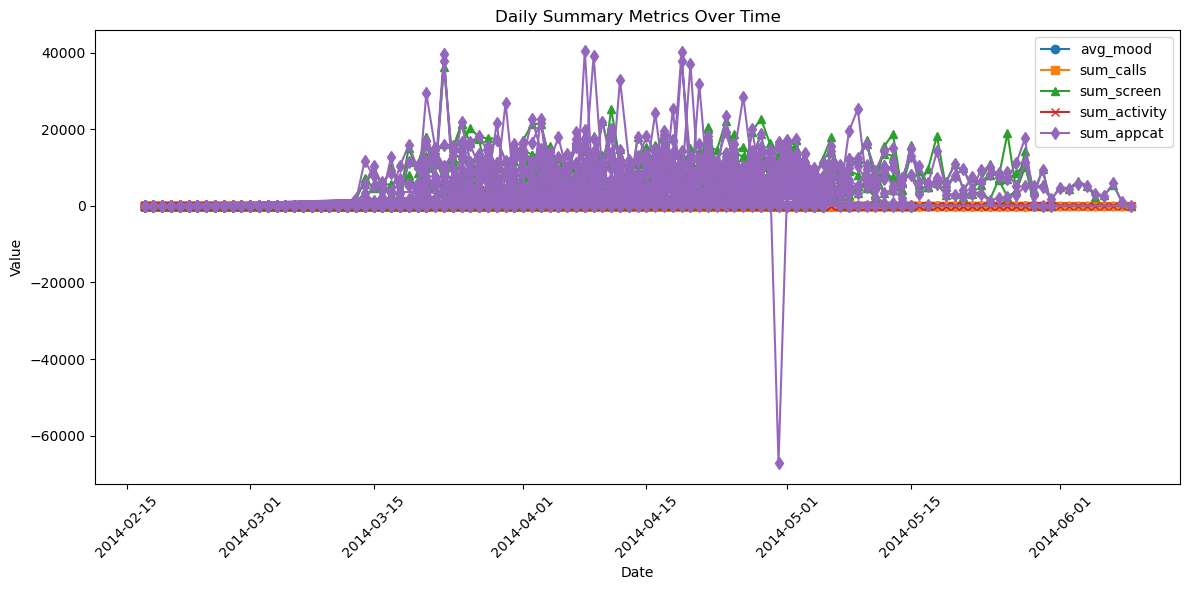

,user_id,date_only,avg_mood,sum_calls,sum_screen,sum_activity,sum_appcat
0,AS14.01,2014-02-17,0.0,2.0,0.0,0.0,0.0
1,AS14.01,2014-02-18,0.0,1.0,0.0,0.0,0.0
2,AS14.01,2014-02-19,0.0,7.0,0.0,0.0,0.0
3,AS14.01,2014-02-20,0.0,2.0,0.0,0.0,0.0
4,AS14.01,2014-02-22,0.0,2.0,0.0,0.0,0.0


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

summary_df = df.copy().rename(columns={'id':'user_id','time':'timestamp'})
summary_df['date_only'] = pd.to_datetime(summary_df['timestamp']).dt.date

daily_mood = summary_df.query("variable=='mood'")\
    .groupby(['user_id','date_only'])['value'].mean().reset_index(name='avg_mood')
daily_calls = summary_df.query("variable=='call'")\
    .groupby(['user_id','date_only'])['value'].sum().reset_index(name='sum_calls')
daily_screen = summary_df.query("variable=='screen'")\
    .groupby(['user_id','date_only'])['value'].sum().reset_index(name='sum_screen')
daily_activity = summary_df.query("variable=='activity'")\
    .groupby(['user_id','date_only'])['value'].sum().reset_index(name='sum_activity')
daily_appcat = summary_df[summary_df['variable'].str.startswith('appCat')]\
    .groupby(['user_id','date_only'])['value'].sum().reset_index(name='sum_appcat')

daily_summary = daily_mood\
    .merge(daily_calls, on=['user_id','date_only'], how='outer')\
    .merge(daily_screen, on=['user_id','date_only'], how='outer')\
    .merge(daily_activity, on=['user_id','date_only'], how='outer')\
    .merge(daily_appcat, on=['user_id','date_only'], how='outer')\
    .fillna(0)

daily_summary.to_csv('daily_summary.csv', index=False)

plt.figure(figsize=(12,6))
for col, marker in zip(['avg_mood','sum_calls','sum_screen','sum_activity','sum_appcat'], ['o','s','^','x','d']):
    plt.plot(daily_summary['date_only'], daily_summary[col], marker=marker, label=col)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Daily Summary Metrics Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

daily_summary.head()